![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 13 - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

In [197]:
import pandas as pd
import numpy as np
from numpy import random
import pandas as pd
from datetime import datetime
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

#pd.options.display.float_format = '{:.0f}'.format

In [2]:
# Aprovechamos la exploración inicial realizada en la Tarea 12 (Tasca Train_Test) para la presente Tarea. En este caso, el 
# tanto el Scatterplot como la Correlation Matrix nos aportan mucha información sobre la relación entre las variables númericas. 

In [3]:
file=pd.read_csv("DelayedFlights.csv", sep=",", encoding='utf8')

In [4]:
file.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
file.describe().round(2)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.00,1936758.0,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758.00,...,1936758.00,1929648.00,1936303.00,1936758.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,3341651.15,2008.0,6.11,15.75,3.98,1518.53,1467.47,1610.14,1634.22,2184.26,...,765.69,6.81,18.23,0.00,0.00,19.18,3.70,15.02,0.09,25.30
std,2066064.96,0.0,3.48,8.78,2.00,450.49,424.77,548.18,464.63,1944.70,...,574.48,5.27,14.34,0.02,0.06,43.55,21.49,33.83,2.02,42.05
min,0.00,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,...,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1517452.50,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,610.00,...,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3242558.00,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1543.00,...,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,4972466.75,2008.0,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3422.00,...,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,7009727.00,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9742.00,...,4962.00,240.00,422.00,1.00,1.00,2436.00,1352.00,1357.00,392.00,1316.00


In [6]:
file.shape

(1936758, 30)

In [7]:
file.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [8]:
# A continuación, vemos que la columna 'Unnamed' no aporta nada, no es más que un contador de filas, así que pasaremos a 
# eliminarla. 

file['Unnamed: 0'].value_counts()

0          1
6846151    1
2232597    1
5967571    1
2242832    1
          ..
4495774    1
6925369    1
3917269    1
3919316    1
2047       1
Name: Unnamed: 0, Length: 1936758, dtype: int64

In [9]:
file.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
# Miramos los valores NaN que tienen las columnas

total_nan_values = file.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [12]:
# Pasamos a GRAFICAR: a través de la matriz de correlación podemos ver cómo algunas de las 29 variables del conjunto de datos 
# presentan multicolinealidad, es decir, pueden predecirse linealmente a partir de las demás.

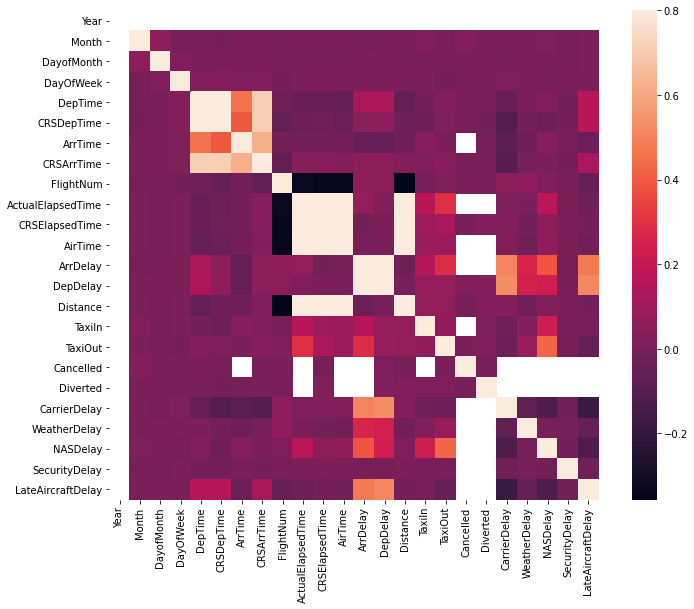

In [13]:
# Matriz de correlación  #

corrmat = file.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


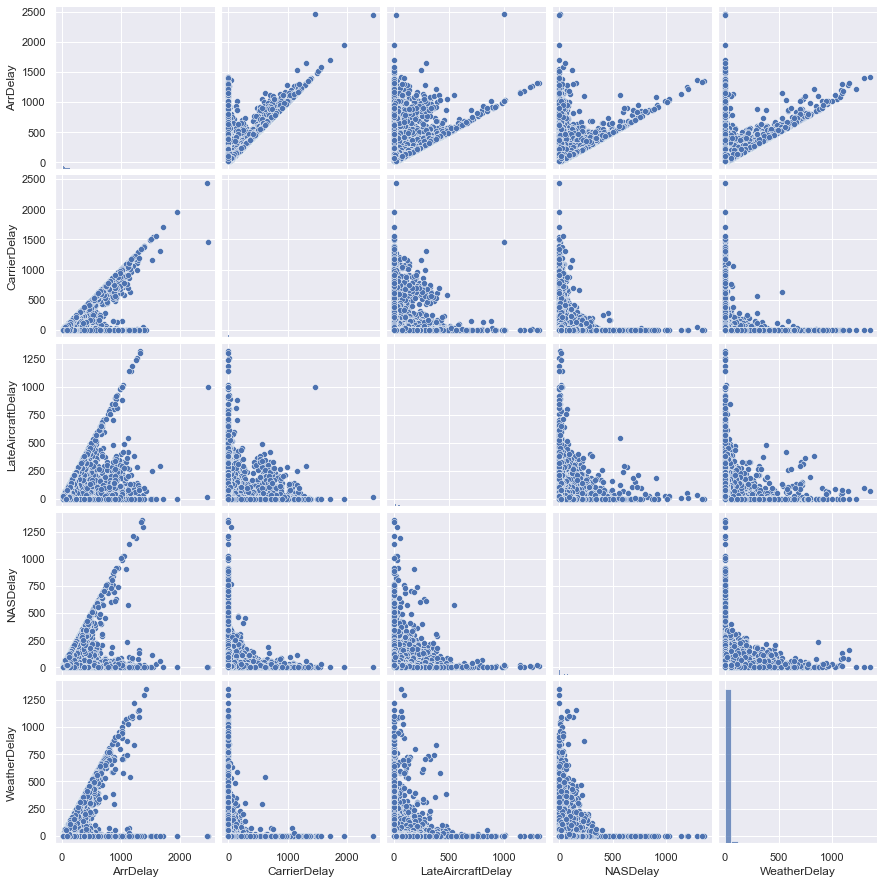

In [12]:
# Scatterplot #

# La matriz de correlación anterior indentifica las tres variables principales que generan los retrasos: Late Aircraft Delay, 
# Carrier Delay and NAS Delay. El scatterplot corrobora este supuesto, mostrando cómo esas tres variables crean la mayoría de 
# los retrasos durante el año.

# Antes de graficar, creamos la columna Status que representa si el vuela llegó en hora (0), con un poco retrasado (1), 
# con mucho retrasado (2), desviado (3) o cancelado (4)

for dataset in file:
    file.loc[file['ArrDelay'] <= 15, 'Status'] = 0
    file.loc[file['ArrDelay'] >= 15, 'Status'] = 1
    file.loc[file['ArrDelay'] >= 60, 'Status'] = 2
    file.loc[file['Diverted'] == 1, 'Status'] = 3
    file.loc[file['Cancelled'] == 1, 'Status'] = 4

sns.set()
Delayedflights = file[(file.Status >= 1) & (file.Status < 3)]
cols = ['ArrDelay', 'CarrierDelay', 'LateAircraftDelay', 'NASDelay', 'WeatherDelay']
sns.pairplot(Delayedflights[cols], size = 2.5)
plt.show()

In [13]:
# Comprabamos las columnas que tienen valores NaN, ya que los modelos de regresión en python no aceptan estos valores.

total_nan_values = file.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [14]:
# De momento, reemplazamos los valores faltantes por la media aritmética de la respectiva variable para evitar pérdida de datos,
# ya que sabemos que seguro vamos a utilizar dichas variables. 

file['ArrDelay']=file['ArrDelay'].fillna(file['ArrDelay'].mean())

In [15]:
file['CarrierDelay']=file['CarrierDelay'].fillna(file['CarrierDelay'].mean())

In [16]:
file['WeatherDelay']=file['WeatherDelay'].fillna(file['WeatherDelay'].mean())

In [17]:
file['SecurityDelay']=file['SecurityDelay'].fillna(file['SecurityDelay'].mean())

In [18]:
file['NASDelay']=file['NASDelay'].fillna(file['NASDelay'].mean())

In [19]:
file['LateAircraftDelay']=file['LateAircraftDelay'].fillna(file['LateAircraftDelay'].mean())

In [20]:
total_nan_values = file.isna().sum()
print ("Total Number of NaN values: "+'\n'+str(total_nan_values))

Total Number of NaN values: 
Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime              7110
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 5
ActualElapsedTime    8387
CRSElapsedTime        198
AirTime              8387
ArrDelay                0
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn               7110
TaxiOut               455
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64


### <span style="color:black">Exercici 1.</span>

__Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv:__ <span style="color:blue">__[X] Fet__</span>

In [21]:
# VAMOS A REALIZAR 3 MODELOS DE REGRESIÓN: REGRESIÓN LINEAL SIMPLE, RANDOM FOREST Y REGRESIÓN POLINÓMICA #

In [22]:
# MODELO DE REGRESIÓN LINEAL SIMPLE #

In [696]:
x= np.array(file['DepDelay']).reshape((-1, 1)) #variable independiente (retraso en la salida)
y= file['ArrDelay'] #variable dependiente (retraso en la llegada)

In [697]:
x.shape, y.shape

((1936758, 1), (1936758,))

In [698]:
model = LinearRegression().fit(x, y) # Creamos el modelo y lo ajustamos

In [699]:
r_sq = model.score(x, y) 

In [700]:
print('coefficient of determination:', r_sq) # el ajuste del modelo es de casi 0.90, por lo que es bastante bueno
print('intercept:', model.intercept_) # nuestro modelo predice la respuesta -1.26 cuando 𝑥 es cero. 
print('slope:', model.coef_) # la respuesta prevista aumenta en 1.006 cuando 𝑥 aumenta en uno.

coefficient of determination: 0.8995207508716909
intercept: -1.2579166978439673
slope: [1.00631293]


In [701]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 6.79258674 17.86202898  6.79258674 ... 79.24711772  9.81152553
  5.78627381]


In [ ]:
# MODELO DE REGRESIÓN RANDOM FOREST 

In [ ]:
# Como tengo problemas de memoria, voy a crear un dataset 'df' con las variables ArrDelay y DepDelay, y posteriormente extraer 
# una muestra aleatoria del 30% del dataset creado

In [702]:
df = pd.DataFrame()
df['X'] = file['DepDelay'] #variable independiente (retraso en la salida)
df['y'] = file['ArrDelay'] #variable dependiente (retraso en la llegada)

In [703]:
df = df.sample(frac=0.30) # extraemos una muestra aleatoria del 20%, así nos aseguramos que es lo suficientemente representativa

In [704]:
# Asignamos las variables con las que vamos a trabajar en el algoritmo

X= np.array(df['X']).reshape((-1, 1)) #variable independiente (hora de salida)
y= df['y'] #variable dependiente (hora de llegada)

In [705]:
y.dtype

dtype('float64')

In [706]:
y=y.round(0).astype(int) # pasamos nuestra variable dependiente a integer ya que RandomForest no me acepta floats

In [707]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [708]:
model3 = RandomForestRegressor(n_estimators = 100).fit(X_train,y_train)

In [721]:
y_pred3 = model3.predict(X_test)
print('predicted response:', y_pred3, sep='\n')

predicted response:
[ 8.787828   34.27958184  7.378319   ...  6.2239409  41.26887345
  4.08628313]


In [710]:
y_test3=y_test.values.reshape((-1, 1))

In [711]:
r_sq3 = model3.score(X, y) 

In [712]:
print('coefficient of determination:', r_sq3) # el ajuste del modelo es de 0.9020, por lo que es bastante bueno

coefficient of determination: 0.9010375416696851


In [206]:
# MODELO DE REGRESIÓN POLINOMICA #

In [713]:
x= np.array(file['DepDelay']).reshape((-1, 1)) #variable independiente (retraso en la salida)
y= file['ArrDelay'] #variable dependiente (retraso en la llegada)

In [714]:
x.shape, y.shape

((1936758, 1), (1936758,))

In [715]:
x_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x)

In [716]:
model2 = LinearRegression().fit(x_, y) # Creamos el modelo y lo ajustamos

In [717]:
r_sq2 = model2.score(x_, y) 
intercept, coefficients = model2.intercept_, model.coef_

In [718]:
print('coefficient of determination:', r_sq2) # el ajuste del modelo es de casi 0.90, es un buen modelo
print('intercept:', intercept) # nuestro modelo predice la respuesta -1.7549 cuando 𝑥 es cero. 
print('coefficients:', coefficients, sep='\n') # la respuesta prevista aumenta en 1.006 cuando 𝑥 aumenta en uno.

coefficient of determination: 0.8996307938198441
intercept: -1.754908274813829
coefficients:
[1.00631293]


In [719]:
y_pred2 = model2.predict(x_)
print('predicted response:', y_pred2, sep='\n')

predicted response:
[ 6.44492148 17.70308049  6.44492148 ... 79.79896114  9.51722554
  5.42050214]


### <span style="color:black">Exercici 2.</span>

__Compara’ls en base al MSE i al R2:__ <span style="color:blue">__[X] Fet__</span>

In [214]:
# COMPARACIÓN EN BASE A R2 #

In [215]:
# Ya lo calculé en el ejercicio anterior, pero igualmente incluyo el resultado en este ejercicio. 

In [720]:
# Vemos que el modelo que tiene mejor ajuste, por muy poco, es el polinómico vs. el modelo lineal simple. En cuanto al modelo
# de regresión multivariable, lo lógica ya nos decía que este modelo seguramente tendría el R2 más bajo ya que las  
# variables independientes eran la distancia del vuelo (en minutos) y los diversos motivos de los retrasos, que tenían
# muchos datos NaN (que fueron sustituidos por sus respectivas medias); obviamente éstas son variables de entrada que 
# proporcionan una información menos "acurada" sobre los retrasos que las variables ArrDelay y DepDelay.

print('coefficient of determination:', r_sq) # Modelo de regresión lineal
print('coefficient of determination:', r_sq3) # Modelo de regresión Random Forest
print('coefficient of determination:', r_sq2) # Modelo de regresión polinómico

coefficient of determination: 0.8995207508716909
coefficient of determination: 0.9010375416696851
coefficient of determination: 0.8996307938198441


In [217]:
# COMPARACIÓN EN BASE A MSE #

In [122]:
# El error cuadrático medio es el criterio de evaluación más usado para problemas de aprendizaje supervisado de regresión y nos 
# proporciona información sobre cuán cerca están los puntos de datos observados de los valores predichos del modelo. Cuanto 
# mayor sea este valor, peor es el modelo.

print('mean squared error:', mean_squared_error(y, y_pred)) # Modelo de regresión lineal
print('mean squared error:', mean_squared_error(y_test3, y_pred3)) # Modelo de regresión Random Forest
print('mean squared error:', mean_squared_error(y, y_pred2)) # Modelo de regresión polinómica

mean squared error: 322.5925190396327
mean squared error: 331.48483358366326
mean squared error: 322.23922189464736


In [ ]:
# Dado que nuestro MSE ha dado unos valores elevados, vamos a comprobar si se debe a valores atípicos. Para ello 
# voy a calcular el MAE, donde error se calcula como un promedio de diferencias absolutas entre los valores objetivo y 
# las predicciones. En este caso todas las diferencias individuales se ponderan por igual en el promedio, por lo que MAE es 
# MENOS sensible a los valores atípicos que el error cuadrático medio. 

In [121]:
print('mean squared error:', mean_absolute_error(y, y_pred)) # Modelo de regresión lineal
print('mean squared error:', mean_absolute_error(y_test3, y_pred3)) # Modelo de regresión Random Forest
print('mean squared error:', mean_absolute_error(y, y_pred2)) # Modelo de regresión polinómico

mean squared error: 11.384686269042618
mean squared error: 11.471854476585033
mean squared error: 11.38877527275136


### <span style="color:black">Exercici 3.</span>

__Entrena’ls utilitzant els diferents paràmetres que admeten:__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# MODELO DE REGRESIÓN LINEAL SIMPLE #

In [1938]:
x= np.array(file['DepDelay']).reshape((-1, 1)) #variable independiente (retraso en la salida)
y= file['ArrDelay'] #variable dependiente (retraso en la llegada)

In [1939]:
# Entrenamos el modelo utilizando los parámetros por defecto. 

model = LinearRegression().fit(x, y) 
r_sq = model.score(x, y) 
print('coefficient of determination:', r_sq) 

coefficient of determination: 0.8995207508716909


In [1940]:
# Entrenamos el modelo variando los parámetros: n_jobs y normalize 

model_2 = LinearRegression(n_jobs=-1, normalize=True).fit(x, y) 
r_sq2 = model_2.score(x, y) # Calculamos el R2 para comprovar el ajuste en cada modelo.
print('coefficient of determination:', r_sq2) 

coefficient of determination: 0.8995207508716908


In [1941]:
# Entrenamos el modelo variando los parámetros: fit_intercept

model_3 = LinearRegression(fit_intercept=False).fit(x, y) 
r_sq3 = model_3.score(x, y) # Calculamos el R2 para comprovar el ajuste en cada modelo.
print('coefficient of determination:', r_sq3) 

coefficient of determination: 0.8992227601508445


In [358]:
# Entrenamos el modelo variando los parámetros: copy_X

model_4 = LinearRegression(copy_X=False).fit(x, y)
r_sq4 = model_4.score(x, y) # Calculamos el R2 para comprovar el ajuste en cada modelo.
print('coefficient of determination:', r_sq4) 

coefficient of determination: 0.8995207508716909


In [319]:
# MODELO DE REGRESIÓN RANDOM FOREST #

In [549]:
df = pd.DataFrame()
df['X'] = file['DepDelay'] #variable independiente (retraso en la salida)
df['y'] = file['ArrDelay'] #variable dependiente (retraso en la llegada)

In [550]:
df = df.sample(frac=0.30) # extraemos una muestra aleatoria del 30%, así nos aseguramos que es lo suficientemente representativa

In [551]:
# Asignamos las variables con las que vamos a trabajar en el algoritmo

X= np.array(df['X']).reshape((-1, 1)) #variable independiente (hora de salida)
y= df['y'] #variable dependiente (hora de llegada)

In [552]:
y.dtype

dtype('float64')

In [553]:
y=y.round(0).astype(int) # pasamos nuestra variable dependiente a integer ya que RandomForest no acepta floats

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [555]:
# Entrenamos el modelo variando los parámetros, y vemos que el modelo mejora de 0.9020 a 0.9011

model_1 = RandomForestRegressor(n_estimators = 1000, max_features = 'sqrt', random_state = 0).fit(X_train,y_train)
r_sq1 = model_1.score(X, y) # Calculamos el R2 para comprovar el ajuste en cada modelo.
print('coefficient of determination:', r_sq1) # el ajuste del modelo es de 0.90, por lo que es bastante bueno

coefficient of determination: 0.9011263744339882


In [556]:
# Entrenamos el modelo variando los parámetros, y vemos que el modelo mejora de 0.9020 a 0.9011

model_2 = RandomForestRegressor(n_estimators = 100, random_state = 42, bootstrap = True, verbose=2).fit(X_train,y_train) 
r_sq2 = model_2.score(X, y) # Calculamos el R2 para comprovar el ajuste en cada modelo.
print('coefficient of determination:', r_sq2) 

building tree 1 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


coefficient of determination: 0.9011097555270134


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.3s finished


In [557]:
# Entrenamos el modelo y observamos que si limitamos la profundidad del árbol, el modelo empeora de 0.9020 a 0.7714

model_3 = RandomForestRegressor(n_estimators = 200, max_depth=2, random_state=0).fit(X_train,y_train) 
r_sq3 = model_3.score(X, y) # Calculamos el R2 para comprovar el ajuste en cada modelo.
print('coefficient of determination:', r_sq3) 

coefficient of determination: 0.7714881567335887


In [ ]:
# MODELO DE REGRESIÓN POLINÓMICA #

In [1229]:
X= np.array(file['DepDelay']).reshape((-1, 1)) #variable independiente (retraso en la salida)
y= file['ArrDelay'] #variable dependiente (hora de llegada)

In [1230]:
X = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X)

In [1231]:
model = LinearRegression().fit(X, y) # Parámetros por defecto
r_sq = model.score(X, y) 
print('coefficient of determination:', r_sq) 

coefficient of determination: 0.8996307938198441


In [1233]:
# Entrenamos el modelo variando los parámetros 

model_2 = LinearRegression(fit_intercept=False).fit(X, y) 
r_sq2 = model_2.score(X, y) # Calculamos el R2 para comprovar el ajuste en cada modelo.
print('coefficient of determination:', r_sq2) 

coefficient of determination: 0.8992242447719256


In [1234]:
# Entrenamos el modelo variando los parámetros, en este caso el modelo empeora considerablemente

model_3 = LinearRegression(copy_X=False).fit(X, y) 
r_sq3 = model_3.score(X, y) # Calculamos el R2 para comprovar el ajuste en cada modelo.
print('coefficient of determination:', r_sq3) 

coefficient of determination: 0.2978552024183604


### <span style="color:black">Exercici 4.</span>

__Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna):__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# Vamos a comparar el rendimiento de los modelos (utilizando train/test), contrastando los datos que han sido predecidos por
# cada modelo con los datos reales. Así podremos comprobar qué modelo se ajusta más. #

In [ ]:
# MODELO DE REGRESIÓN LINEAL SIMPLE #

In [558]:
X= np.array(file['DepDelay']).reshape((-1, 1)) #variable independiente (retraso en la salida)
y= file['ArrDelay'] #variable dependiente (retraso en la llegada)

In [559]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [560]:
model = LinearRegression().fit(X_train, y_train) 

In [561]:
y_pred = model.predict(X_test) # Ahora hagamos una predicción sobre los datos de la prueba.

In [562]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Revisemos la diferencia entre el valor real y el valor predecido.
df.head()

,Actual,Predicted
318711,24.0,14.838383
1638937,19.0,21.884291
232293,24.0,41.008897
938296,23.0,44.028572
1353339,66.0,52.081038


In [563]:
df.shape 

(387352, 2)

In [564]:
y_test = y_test.values.reshape(387352, 1) # pasamos el df a numpy para graficar
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) # el método flatten() devuelve una copia del array a una única dimensión
df.head()

,Actual,Predicted
0,24.0,14.838383
1,19.0,21.884291
2,24.0,41.008897
3,23.0,44.028572
4,66.0,52.081038


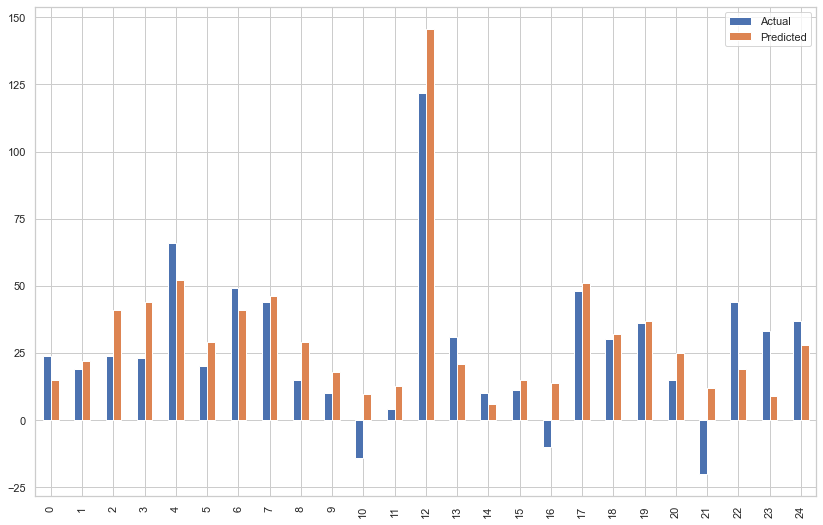

In [565]:
# Aunque nuestro modelo no es muy preciso, los porcentajes predichos se acercan a los reales.

df1 = df.head(25) # Vamos a graficar las 25 primeras entradas 

df1.plot(kind='bar',figsize=(14,9))
plt.show()

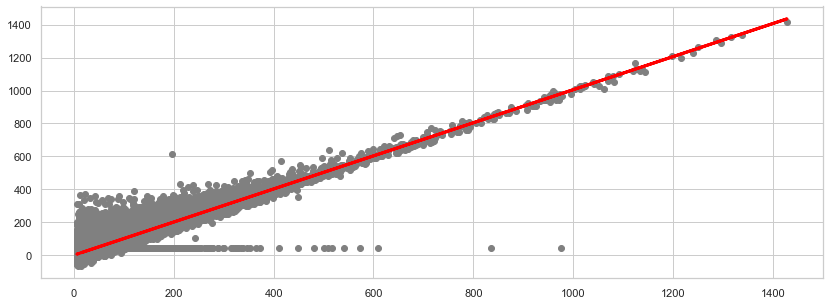

In [566]:
# Vamos a trazar nuestra línea recta con los datos de la prueba para ver la predicción. La línea recta del gráfico muestra que 
# nuestro algoritmo es bastante correcto. 

fig, ax = plt.subplots(figsize = (14, 5))
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.show()

In [ ]:
# MODELO DE REGRESIÓN RANDOM FOREST #

In [567]:
df = pd.DataFrame()
df['X'] = file['DepDelay'] #variable independiente (retraso en la salida)
df['y'] = file['ArrDelay'] #variable dependiente (retraso en la llegada)

In [568]:
df = df.sample(frac=0.30) # extraemos una muestra aleatoria del 30%, así nos aseguramos que es lo suficientemente representativa

In [569]:
# Asignamos las variables con las que vamos a trabajar en el algoritmo

X= np.array(df['X']).reshape((-1, 1)) #variable independiente (retraso en la salida)
y= df['y'] #variable dependiente (retraso en la llegada)

In [570]:
y.dtype

dtype('float64')

In [571]:
y=y.round(0).astype(int) # pasamos nuestra variable y a integer ya que RandomForest me da problema con los valores float

In [572]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [573]:
model = RandomForestRegressor(n_estimators = 1000, random_state = 0).fit(X_train,y_train)

r_sq = model.score(X, y) # Calculamos el R2 para comprovar el ajuste en cada modelo.
print('coefficient of determination:', r_sq) # el ajuste del modelo es de 0.90, por lo que es bastante bueno

coefficient of determination: 0.900657467079892


In [574]:
y_pred = model.predict(X_test) # Ahora hacemos una predicción sobre los datos de la prueba.

In [575]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Revisemos la diferencia entre el valor real y el valor predecido.
df.head()

,Actual,Predicted
1716302,4,10.240289
970703,178,186.954233
1522039,3,5.192955
1394884,18,36.979851
1898855,20,13.951477


In [576]:
df.shape

(116206, 2)

In [578]:
y_test = y_test.values.reshape(116206, 1) # pasamos el df a numpy para graficar
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) # el método flatten() devuelve una copia del array a una única dimensión
df.tail()

,Actual,Predicted
116201,52,57.613355
116202,54,53.351079
116203,54,61.217889
116204,16,26.443329
116205,12,26.443329


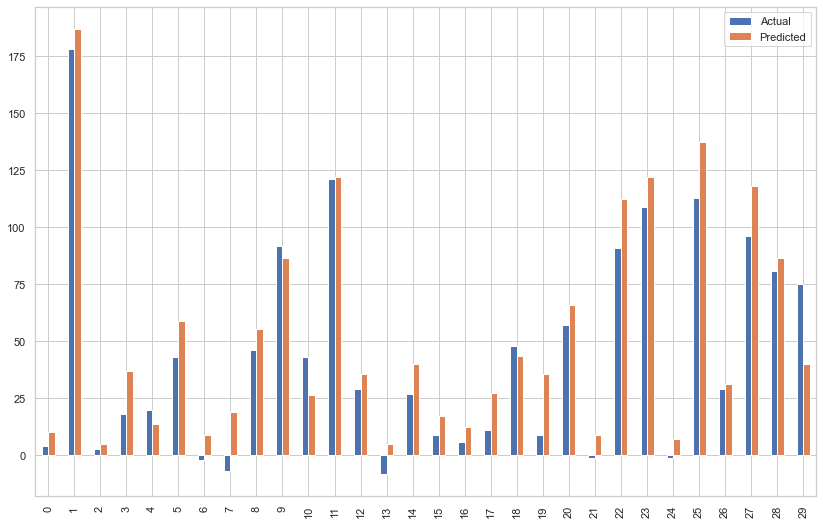

In [579]:
# Aunque nuestro modelo no es muy preciso, los porcentajes predichos se acercan a los reales.

df1 = df.head(30) # Vamos a graficar las 25 primeras entradas 

df1.plot(kind='bar',figsize=(14,9))
plt.show()

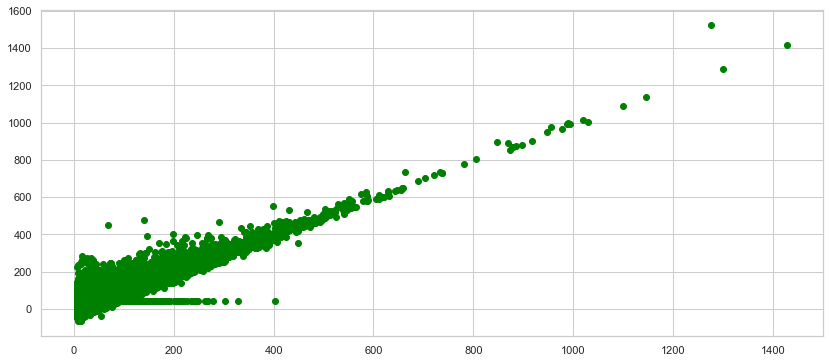

In [583]:
# Vamos a trazar nuestra línea recta con los datos de la prueba para ver la predicción La línea recta del gráfico
# muestra que nuestro algoritmo es muy correcto. 

fig, ax = plt.subplots(figsize = (14, 6))
plt.scatter(X_test, y_test,  color='green')
#plt.plot(X_test, y_pred,  color='red', linewidth=2)
plt.show()

In [ ]:
# MODELO DE REGRESIÓN POLINÓMICA #

In [602]:
X= np.array(file['DepDelay']).reshape((-1, 1)) #variable independiente (retraso en la salida)
y= file['ArrDelay'] #variable dependiente (retraso en la llegada)

In [603]:
X = PolynomialFeatures(degree=4, include_bias=False).fit_transform(X)

In [604]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [605]:
model = LinearRegression().fit(X_train, y_train) 

In [606]:
y_pred = model.predict(X_test) # Ahora hagamos una predicción sobre los datos de la prueba.

In [607]:
X_test.shape, y_test.shape

((387352, 4), (387352,))

In [608]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Revisemos la diferencia entre el valor real y el valor predecido.
df.head()

,Actual,Predicted
595091,9.0,20.758196
699277,-3.0,5.251061
513280,13.0,20.758196
555111,11.0,14.564190
1269142,19.0,17.662649


In [609]:
df.shape 

(387352, 2)

In [610]:
y_test = y_test.values.reshape(387352, 1) # pasamos el df a numpy para graficar
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) # el método flatten() devuelve una copia del array a una única dimensión
df.head()

,Actual,Predicted
0,9.0,20.758196
1,-3.0,5.251061
2,13.0,20.758196
3,11.0,14.564190
4,19.0,17.662649


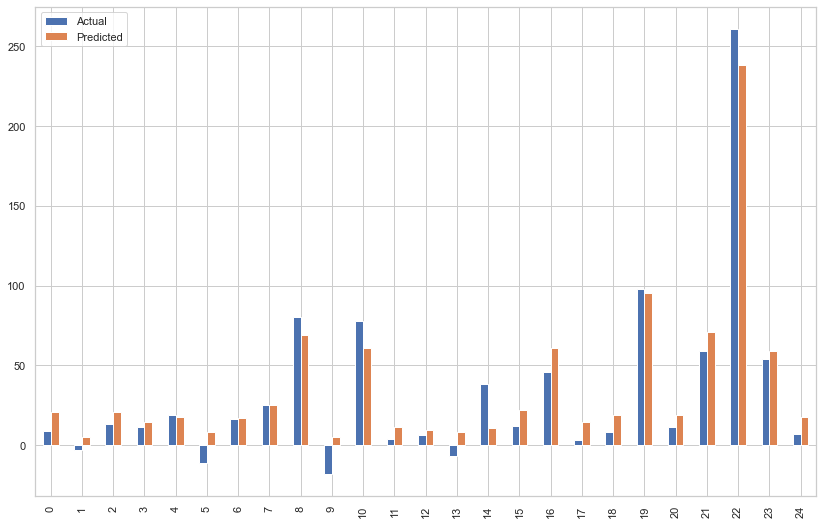

In [611]:
# Aunque nuestro modelo no es muy preciso, los porcentajes predichos se acercan a los reales.

df1 = df.head(25) # Vamos a graficar las 25 primeras entradas 

df1.plot(kind='bar',figsize=(14,9))
plt.show()

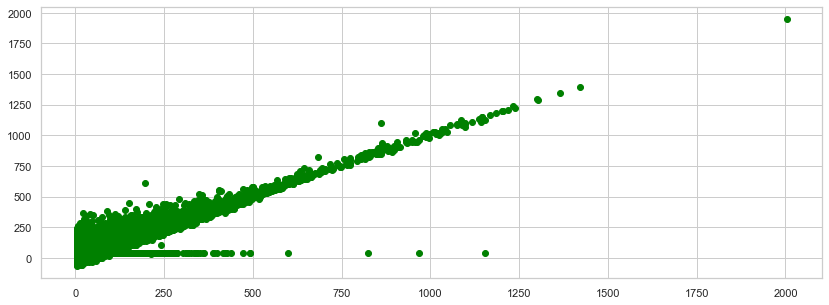

In [613]:
# En este caso, vamos a a visualizar la correlación entre los datos reales y los datos predecidos, ya que X_test
# es multidimensional. En este caso vemos que el gráfico muestra una línea bastante recta, lo que nos dice que nuestro algoritmo 
# es bastante correcto. 

fig, ax = plt.subplots(figsize = (14, 5))
plt.scatter(df['Predicted'], df['Actual'], color='green')
#plt.plot(X_test, y_pred, color='pink', linewidth=2)
plt.show()

### <span style="color:black">Exercici 5.</span>

__Realitza algun procés d’enginyeria de variables per millorar-ne la predicció:__<span style="color:blue">__[X] Fet__</span>

In [ ]:
# En los ejercicios anteriores hemos visto que el modelo de regresión lineal simple era el menos preciso, por muy poco, de los 3
# modelos, pero quizá podría mejorarse el el algoritmo si eliminamos los outliers y standarizamos los valores y, por tanto, 
# realizar predicciones mucho más ajustadas. Vamos a verlo.  

In [777]:
# Volvemos a definir las variables.

X= np.array(file['DepDelay']).reshape((-1, 1)) #variable independiente (retraso en la salida)
y= file['ArrDelay'] #variable dependiente (retraso en la llegada)

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


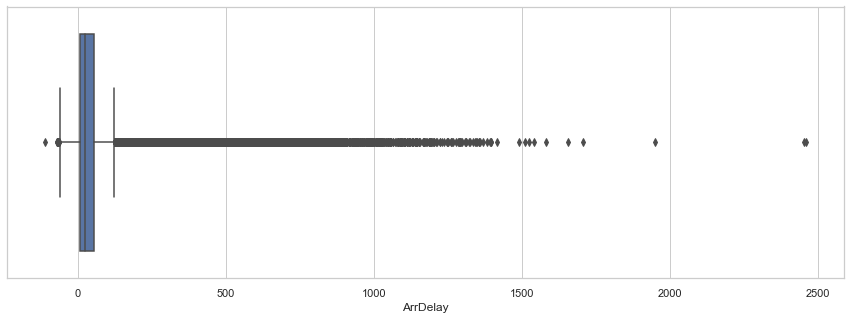

In [779]:
# En los dos gráficos siguientes observamos que tanto en DepDelay como en ArrDelay hay muchísimos outliers. 

plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y)

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


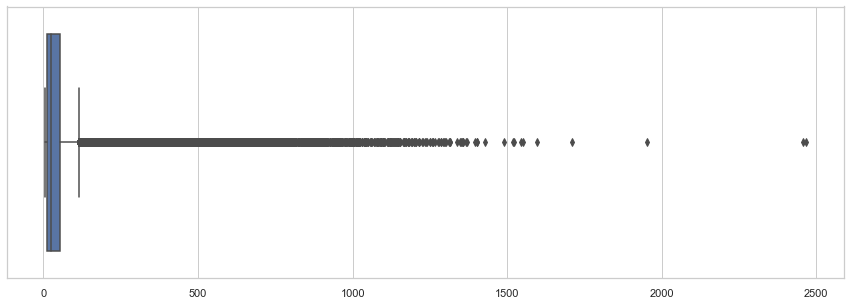

In [780]:
plt.figure(figsize=(15,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(X)

In [781]:
# En los siguientes pasos, vamos a preceder a crear un dataframe con ambas variables y eliminar los outliers entre los  
# cuartiles 0.25 y 0.75 

In [782]:
df=pd.DataFrame()
df=pd.DataFrame(X, columns=['X'])
df['y']=pd.DataFrame(y)

In [783]:
# Eliminamos los outliers

Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)

# mantiene filas en el marco de datos que tengan valores dentro de 1.5 * IQR de Q1 y Q3
data_clean = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

# vemos las filas que quedan
data_clean.shape

(1764508, 2)

In [786]:
# Como comentábamos en al comentar el ejercicio, una vez eliminados los outliers, vamos a estandarizar los valores de ambas 
# variables.  

ss = StandardScaler()
file_transformed = ss.fit_transform(data_clean)
file_transformed

array([[-0.89800506, -1.48571029],
       [-0.46283205, -0.93212239],
       [-0.89800506, -0.51693146],
       ...,
       [ 1.95040015,  2.4240043 ],
       [-0.77932151, -0.68992768],
       [-0.93756625, -1.1743171 ]])

In [787]:
stack = pd.DataFrame(file_transformed)

In [788]:
stack.head()

,0,1
0,-0.898005,-1.485710
1,-0.462832,-0.932122
2,-0.898005,-0.516931
3,0.130586,0.175053
4,-0.225465,-0.620729


In [801]:
X= np.array(data_clean['X']).reshape(-1, 1) #variable independiente (retrasos en la salida)
y= data_clean['y'] #variable dependiente (retraso en la llegada)

In [802]:
model = LinearRegression().fit(X, y) # Creamos el modelo y lo ajustamos

In [803]:
y_pred = model.predict(X) # Ahora hagamos una predicción sobre los datos de la prueba.

In [804]:
y_pred.shape, y.shape, X.shape

((1764508,), (1764508,), (1764508, 1))

In [805]:
y = y.values.reshape(1764508, 1) # pasamos el df a numpy para graficar
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()}) # el método flatten() devuelve una copia del array a una única dimensión
df.head()

,Actual,Predicted
0,-14.0,6.550975
1,2.0,17.400953
2,14.0,6.550975
3,34.0,32.196378
4,11.0,23.319123


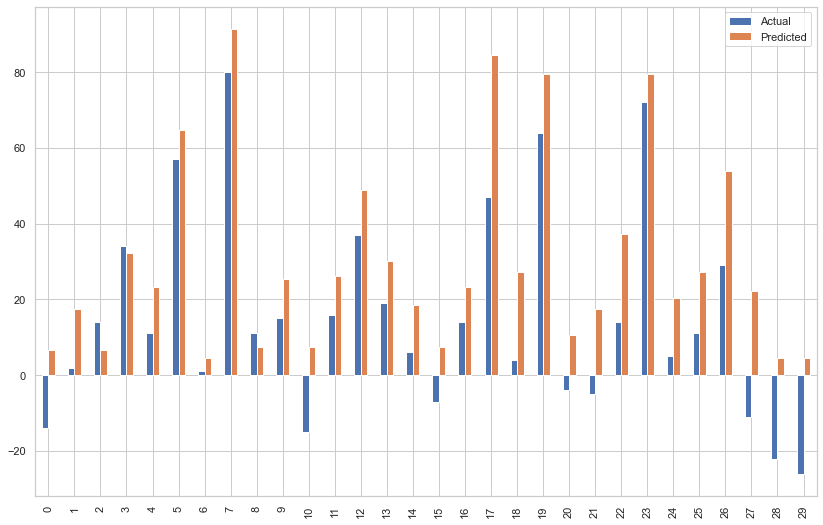

In [806]:
#Por el resultado del gráfico parece que sí hemos podido mejorar nuestro algoritmo.

df1 = df.head(30) # Vamos a graficar las 30 últimas entradas 

df1.plot(kind='bar',figsize=(14,9))
plt.show()

In [807]:
r_sq = model.score(X, y) 

In [808]:
# Ahora vamos a verlo en números: aunque el coeficiente de determinación de determinación ha disminuido , vemos que tanto MSE como MAE han
# MSE como MAE han mejorado considerablemente

print('mean squared error:', mean_squared_error(y, y_pred)) # MSE en ejercicio 2 = 322.5925
print('mean absolute error:', mean_absolute_error(y, y_pred)) # MSE en ejercicio 2 = 11.3846
print('coefficient of determination:', r_sq) # R_sq en ejercicio 1 = 0.89

mean squared error: 213.71410355078606
mean absolute error: 10.276051899067053
coefficient of determination: 0.7441612007118529


### <span style="color:black">Exercici 6.</span>

__No utilitzis la variable DepDelay a l’hora de fer prediccions:__ <span style="color:blue">__[X] Fet__</span>

In [256]:
# Como no podemos utilizar la variable DepDelay, vamos a realizar un sumatorio de las variables donde se describe el motivo 
# de los retrasos (LateAircraftDelay, CarrierDelay, NASDelay, SecurityDelay y WeatherDelay), expresadas también en minutos, 
# para intentar predecir el retraso, ArrDelay, en cada caso. 

In [168]:
suma = file["LateAircraftDelay"] + file["CarrierDelay"] + file["NASDelay"] + file["SecurityDelay"] + file["WeatherDelay"]

data = pd.DataFrame()
data["Delay"] = suma
X = np.array(data) # variables independientes (la suma de retrasos provocados por diversos motivos)
y= file['ArrDelay'] #variable dependiente (retraso en la llegada)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [170]:
model = LinearRegression().fit(X_train, y_train) 
y_pred = model.predict(X_test) # Ahora hagamos una predicción sobre los datos de la prueba.

In [171]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Revisemos la diferencia entre el valor real y el valor previsto.
df.head()
df.head()

,Actual,Predicted
595091,9.0,42.190040
699277,-3.0,42.190040
513280,13.0,42.190040
555111,11.0,42.190040
1269142,19.0,-2.105631


In [172]:
y_test = y_test.values.reshape(387352, 1) # pasamos el df a numpy para graficar
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}) # el método flatten() devuelve una copia del array a una única dimensión
df.tail()

,Actual,Predicted
387347,147.0,125.907265
387348,9.0,42.190040
387349,36.0,14.896082
387350,41.0,19.896585
387351,72.0,50.899709


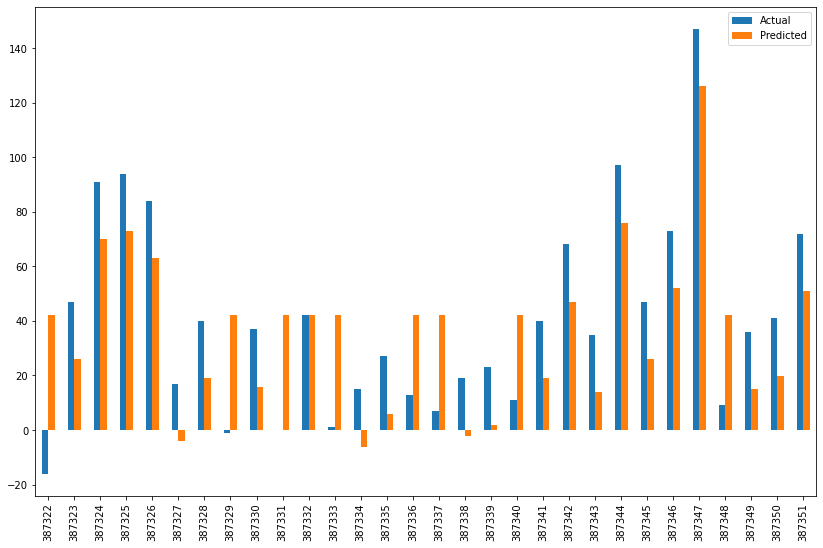

In [187]:
# Aunque nuestro modelo no es muy preciso, los porcentajes predichos se acercan a los reales.

df1 = df.tail(30) # Vamos a graficar las 30 últimas entradas 

df1.plot(kind='bar',figsize=(14,9))
plt.show()

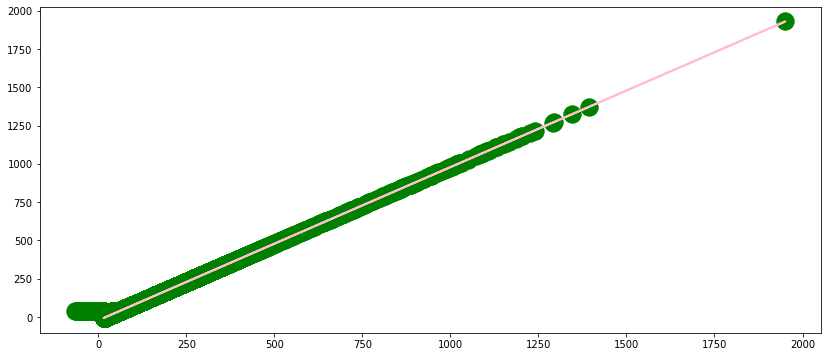

In [186]:
# Vamos a trazar nuestra línea recta con los datos de la prueba para ver la predicción. La línea recta del gráfico
# muestra que nuestro algoritmo es muy correcto. 

fig, ax = plt.subplots(figsize = (14, 6))
plt.scatter(df['Actual'], df['Predicted'], color='green', s=300)
plt.plot(X_test, y_pred, color='pink', linewidth=2)
plt.show()

In [176]:
r_sq = model.score(X, y)
print('El coeficiente de determinación es: ', r_sq)

El coeficiente de determinación es:  0.7405150029989125
